In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('drive/MyDrive/MASTER/DATASCIENCE/PROYECTO/DATOS/Gasto_Medio_Diario_Persona_Prov.csv', sep=';', decimal=',')

In [6]:
df.head()

,FECHA,Provincia,Gasto_Medio_Diario
0,01/01/2018,Andalucía,102
1,02/01/2018,Andalucía,102
2,03/01/2018,Andalucía,102
3,04/01/2018,Andalucía,102
4,05/01/2018,Andalucía,102


In [7]:
df.FECHA=pd.to_datetime(df.FECHA, format="%d/%m/%Y")

In [8]:
df.set_index('FECHA').resample('W')

In [9]:
df.head()

,FECHA,Provincia,Gasto_Medio_Diario
0,2018-01-01,Andalucía,102
1,2018-01-02,Andalucía,102
2,2018-01-03,Andalucía,102
3,2018-01-04,Andalucía,102
4,2018-01-05,Andalucía,102


In [10]:
df = df.set_index('FECHA')
df.head()

,Provincia,Gasto_Medio_Diario
FECHA,,
2018-01-01,Andalucía,102
2018-01-02,Andalucía,102
2018-01-03,Andalucía,102
2018-01-04,Andalucía,102
2018-01-05,Andalucía,102


In [11]:
Mallorca_df = df[df["Provincia"] == "Mallorca"]


In [12]:
Mallorca_df.head()

,Provincia,Gasto_Medio_Diario
FECHA,,
2018-01-01,Mallorca,113
2018-01-02,Mallorca,113
2018-01-03,Mallorca,113
2018-01-04,Mallorca,113
2018-01-05,Mallorca,113


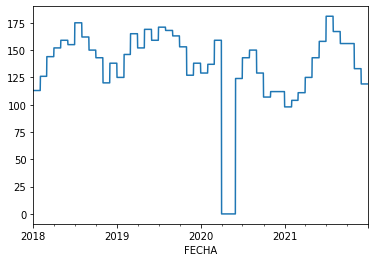

In [13]:
Mallorca_df['Gasto_Medio_Diario'].plot()

In [14]:
# create timeseries readable by fbprophet
ts = pd.DataFrame({'ds':Mallorca_df.index,'y':Mallorca_df.Gasto_Medio_Diario})
#ts['cap'] = 30000 # unused in linear growth
#ts['floor'] = 0 # unused in linear growth
ts.head()

,ds,y
FECHA,,
2018-01-01,2018-01-01,113
2018-01-02,2018-01-02,113
2018-01-03,2018-01-03,113
2018-01-04,2018-01-04,113
2018-01-05,2018-01-05,113


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


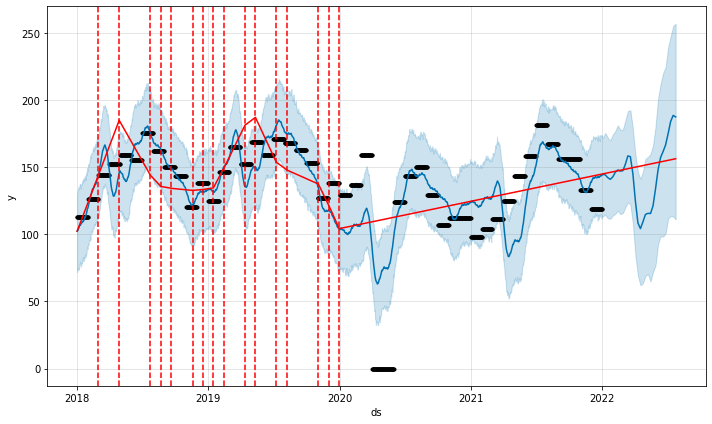

In [15]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
# instantiate the model and fit the timeseries
prophet = Prophet(changepoint_range=0.5,changepoint_prior_scale=0.5)
prophet.fit(ts)

# create a future data frame 
future = prophet.make_future_dataframe(periods=30, freq='W') #documentación para ver cómo poner semanas
forecast = prophet.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)
#fig

In [16]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,102.324509,71.825537,129.054983
1,2018-01-02,102.971329,75.000103,132.942761
2,2018-01-03,102.866656,73.608556,132.826616
3,2018-01-04,103.628823,73.222863,133.065719
4,2018-01-05,104.231421,74.150189,135.274379


In [17]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1486,2022-06-26,154.627422,100.606168,224.558141,95.906120,203.896677,11.878840,11.878840,11.878840,0.068766,0.068766,0.068766,11.810074,11.810074,11.810074,0.0,0.0,0.0,166.506262
1487,2022-07-03,155.016520,111.557001,239.177685,93.434641,208.021210,19.901425,19.901425,19.901425,0.068766,0.068766,0.068766,19.832659,19.832659,19.832659,0.0,0.0,0.0,174.917945
1488,2022-07-10,155.405618,113.624510,247.293192,90.210957,212.427625,28.524142,28.524142,28.524142,0.068766,0.068766,0.068766,28.455376,28.455376,28.455376,0.0,0.0,0.0,183.929759
1489,2022-07-17,155.794716,113.187942,255.047116,86.995628,215.350334,32.658135,32.658135,32.658135,0.068766,0.068766,0.068766,32.589370,32.589370,32.589370,0.0,0.0,0.0,188.452851
1490,2022-07-24,156.183813,110.994052,256.769836,83.387201,218.715045,31.166162,31.166162,31.166162,0.068766,0.068766,0.068766,31.097396,31.097396,31.097396,0.0,0.0,0.0,187.349975


In [20]:
# Guardamos el resultado en un fichero csv separado por comas. 
forecast.to_csv('gasto_mallorca.csv',  index=False, sep=";", decimal=",")